In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

Tasking...:

Apply data analysis on 'bikes.csv' dataset.
here is some questions to think about 
1. Make Profit Feature.
    - Each registerd user rent bike for 5 USD/hour.
    - Casual user rent bike for 20 USD/hour.
    - Taxes 0.14%.
    - Maintance 1500/year.
2. Distribution rental_bikes_count & profit.
3. Profit for each day.
4. Which season that has more registeration & profit.
5. Which weather condition that has more registeration & profit.
6. Correlation between profit & bikes count with all features.
7. Rentals during rush hours (7-9 am & 3-5 pm).
7. Rentals during workday & holiday.
8. Registered or casual is more.
9. What is the average of bikes would be registered during the week.
10. Schools (9-12) & (2-6) profit.
11. Profit in 2011 & saturdays & season fall

In [4]:
df=pd.read_csv(r'D:\COURSES\AI\Epsilon Ai\Session 20\Assiment\Assignment datasets\Bikes.csv')
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129


In [5]:
# 1.Make Profit Feature

In [6]:
df['Profit'] = (df['registered'] * 5 + df['casual'] * 20) * (1 - 0.14) - 1500
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,-1392.5
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,-1224.8
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,-1297.9
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,-1405.4
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,-1495.7
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,35.1
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,-334.7
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,-726.0
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,-790.5


In [7]:
# 2. Distribution of rental_bikes_count & profit

<Axes: xlabel='rented_bikes_count', ylabel='Profit'>

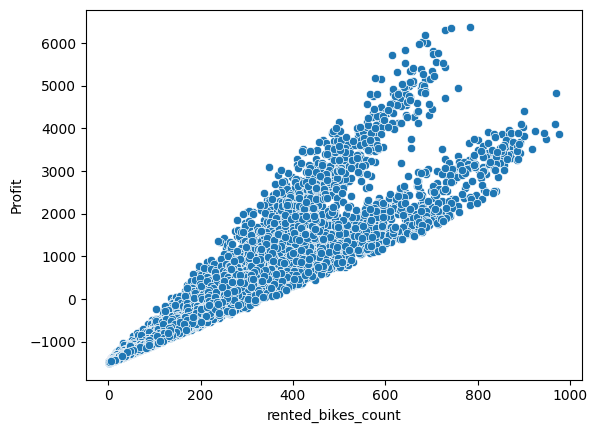

In [8]:
sns.scatterplot(x=df['rented_bikes_count'],y=df['Profit'])

In [9]:
# 3. Profit for each day

In [10]:
daily_profit = df.groupby('datetime')['Profit'].sum()
daily_profit

datetime
2011-01-01 00:00:00   -1392.5
2011-01-01 01:00:00   -1224.8
2011-01-01 02:00:00   -1297.9
2011-01-01 03:00:00   -1405.4
2011-01-01 04:00:00   -1495.7
                        ...  
2012-12-19 19:00:00      35.1
2012-12-19 20:00:00    -334.7
2012-12-19 21:00:00    -726.0
2012-12-19 22:00:00    -790.5
2012-12-19 23:00:00   -1070.0
Name: Profit, Length: 10886, dtype: float64

In [11]:
df['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [12]:
# 4. Season with more registration & profit

In [13]:
season_registration = df.groupby('season')['registered'].sum()
season_profit = df.groupby('season')['Profit'].sum()

In [14]:
season_registration

season
Fall      488252
Spring    265322
Summer    446991
Winter    457276
Name: registered, dtype: int64

In [15]:
season_profit

season
Fall       489754.0
Spring   -2114255.0
Summer      89232.1
Winter    -745527.2
Name: Profit, dtype: float64

In [16]:
# 5. Weather condition with more registration & profit

In [17]:
weather_registration=df.groupby('weather')['registered'].sum()
weather_profit=df.groupby('weather')['Profit'].sum()

In [18]:
weather_registration

weather
Clear    951449
Mist     336229
Rainy     70204
Snowy       158
Name: registered, dtype: int64

In [19]:
weather_profit

weather
Clear   -625808.9
Mist    -742791.7
Rainy   -529778.0
Snowy      -717.4
Name: Profit, dtype: float64

In [20]:
# 6. Correlation between profit & bikes count with all features

In [21]:
correlation=df[['Profit', 'rented_bikes_count', 'holiday','workingday','temp','humidity','windspeed','casual','registered']].corr()
correlation

,Profit,rented_bikes_count,holiday,workingday,temp,humidity,windspeed,casual,registered
Profit,1.000000,0.934490,0.017410,-0.150218,0.462618,-0.358150,0.100205,0.902713,0.822156
rented_bikes_count,0.934490,1.000000,-0.005827,0.010940,0.391867,-0.317282,0.097747,0.690414,0.970948
holiday,0.017410,-0.005827,1.000000,-0.249189,-0.001047,0.016190,0.010463,0.042519,-0.021017
workingday,-0.150218,0.010940,-0.249189,1.000000,0.018954,-0.019167,0.020668,-0.318348,0.118612
temp,0.462618,0.391867,-0.001047,0.018954,1.000000,-0.068240,-0.025425,0.466035,0.315430
humidity,-0.358150,-0.317282,0.016190,-0.019167,-0.068240,1.000000,-0.312628,-0.344939,-0.266432
windspeed,0.100205,0.097747,0.010463,0.020668,-0.025425,-0.312628,1.000000,0.085055,0.089105
casual,0.902713,0.690414,0.042519,-0.318348,0.466035,-0.344939,0.085055,1.000000,0.497250
registered,0.822156,0.970948,-0.021017,0.118612,0.315430,-0.266432,0.089105,0.497250,1.000000


In [22]:
# 7. Rentals during rush hours (7-9 am & 3-5 pm)

In [23]:
rush_hour_rentals = df[(df['hours'].isin([7, 8, 15, 16]))]
rush_hour_rentals

KeyError: 'hours'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
 11  Profit              10886 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 1020.7+ KB


In [ ]:
df['datetime']=pd.to_datetime(df['datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  Profit              10886 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 1020.7+ KB


In [ ]:
df['hours'] = df['datetime'].dt.hour
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,hours
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,-1392.5,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,-1224.8,1
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,-1297.9,2
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,-1405.4,3
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,-1495.7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,35.1,19
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,-334.7,20
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,-726.0,21
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,-790.5,22


In [ ]:
# 8. Rentals during workday & holiday

In [ ]:
workday_rentals = df[df['workingday'] == 1]['rented_bikes_count'].sum()
holiday_rentals = df[df['workingday'] == 0]['rented_bikes_count'].sum()

In [ ]:
workday_rentals

1226368

In [ ]:
holiday_rentals

569063

In [ ]:
# 9. Registered vs Casual users

In [ ]:
registered_count = df['registered'].sum()
casual_count = df['casual'].sum()

In [ ]:
registered_count

1693341

In [ ]:
casual_count

392135

In [ ]:
# 10. Average bikes registered during the week

In [ ]:
average_registered_per_week =df.groupby('weekday')['registered'].mean()

In [ ]:
df['weekday'] = df['datetime'].dt.week
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,hours,weekday
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,-1392.5,0,52
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,-1224.8,1,52
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,-1297.9,2,52
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,-1405.4,3,52
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,-1495.7,4,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,35.1,19,51
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,-334.7,20,51
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,-726.0,21,51
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,-790.5,22,51


In [ ]:
average_registered_per_week

weekday
1      85.310030
2      82.381818
3      93.811688
5      95.072797
6      94.621212
7     108.958065
9      93.192469
10    112.318182
11    142.649351
12    215.458333
13     89.229167
14    135.964179
15    141.637725
16    181.722222
17     92.208333
18    171.253205
19    175.181548
20    184.820833
22    171.182292
23    193.092262
24    190.803571
25    214.645833
26    140.708333
27    167.973214
28    190.752976
29    205.763889
31    175.121528
32    182.452381
33    194.121528
35    139.840278
36    170.047904
37    207.447761
38    210.416667
39     88.562500
40    190.029762
41    183.711310
42    206.905759
44    162.237500
45    168.797015
46    162.028846
47    210.416667
48    145.645833
49    155.738095
50    162.455357
51    183.062500
52     41.295775
Name: registered, dtype: float64

In [ ]:
# 11. Schools (9-12) & (2-6) profit

In [ ]:
school_hours_profit = df[(df['hours'].isin(range(9, 13)) | df['hours'].isin(range(14, 19)))]['Profit'].sum()

In [ ]:
school_hours_profit

2254557.0999999996

In [ ]:
# 12. Profit in 2011 & Saturdays & Fall

In [ ]:
profit_2011_saturdays_fall = df[(df['year'] == 2011) & (df['weekday'] == 'Saturday') & (df['season'] == 'Fall')]['Profit'].sum()

In [ ]:
df['year'] = df['datetime'].dt.year
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,hours,weekday,year
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,-1392.5,0,52,2011
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,-1224.8,1,52,2011
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,-1297.9,2,52,2011
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,-1405.4,3,52,2011
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,-1495.7,4,52,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,35.1,19,51,2012
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,-334.7,20,51,2012
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,-726.0,21,51,2012
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,-790.5,22,51,2012


In [ ]:
profit_2011_saturdays_fall

0.0